In [13]:
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as pl
import numpy as np
import datetime

In [ ]:
gunluk='https://www.dropbox.com/s/jdsvowkiu1eyzvu/g%C3%BCnl%C3%BCk.ods?dl=0'

In [14]:
%matplotlib inline

In [2]:
def GetOrdIdcs(ordnum):
    # There are three rows for each order, open, modify and close.
    # Data needs to be gleened from each and put into a single row in the new df.
    # Needs three indices.
    idx1 = dfTradeRecord[(dfTradeRecord.Order==ordnum) & ((dfTradeRecord.Type=='buy')
                                                           |(dfTradeRecord.Type=='sell'))].index
    idx1 = idx1.values[0]
    idx2 = dfTradeRecord[(dfTradeRecord.Order==ordnum) & (dfTradeRecord.Type=='modify')].index
    idx2 = idx2.values[0]
    idx3 = dfTradeRecord[(dfTradeRecord.Order==ordnum) & ((dfTradeRecord.Type=='t/p')
                                                          |(dfTradeRecord.Type=='s/l'))].index
    idx3 = idx3.values[0]
    return idx1,idx2,idx3

def GetDurSec(dfm,idc):
    dt0 = str(dfm.loc[idc[0],'Date']) + ' ' + str(dfm.loc[idc[0],'Time'])
    dt1 = str(dfm.loc[idc[1],'Date']) + ' ' + str(dfm.loc[idc[1],'Time'])
    dt0s=datetime.datetime.strptime(dt0,'%Y-%m-%d %H:%M:%S')
    dt1s=datetime.datetime.strptime(dt1,'%Y-%m-%d %H:%M:%S')
    deldt = dt1s - dt0s
    return deldt.total_seconds()

In [3]:
def DayNumToStr(x):
    weekdays=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
    numdaydict={k:wd for k,wd in zip(np.arange(0,7),weekdays)}
    return numdaydict[x]

In [4]:
url='file:///Users/grayWolf/Work/FX/FXReportAnalysis/StrategyTester.htm'
listTables = pd.read_html(url,header=0,index_col=0)
dfTradeRecord = listTables[1]
dfTradeRecord.Time = pd.to_datetime(dfTradeRecord.Time)
dfTradeRecord["weekday"] = dfTradeRecord["Time"].dt.dayofweek
dfTradeRecord["dayhour"] = dfTradeRecord["Time"].dt.hour
dfTradeRecord['Date'],dfTradeRecord['Time']= dfTradeRecord['Time'].apply(lambda x:x.date()), \
                                                dfTradeRecord['Time'].apply(lambda x:x.time())
dfTradeRecord['wday'] = dfTradeRecord['weekday'].map(DayNumToStr)
dfTradeRecord.head(40)

,Time,Type,Order,Size,Price,S / L,T / P,Profit,Balance,weekday,dayhour,Date,wday
#,,,,,,,,,,,,,
1,02:42:00,sell,1,1.0,1.37367,0.00000,0.00000,NaN,NaN,3,2,2014-01-02,Thu
2,02:42:00,modify,1,1.0,1.37367,1.38067,1.37208,NaN,NaN,3,2,2014-01-02,Thu
3,03:13:00,t/p,1,1.0,1.37208,1.38067,1.37208,159.0,10159.0,3,3,2014-01-02,Thu
4,04:10:00,sell,2,1.0,1.36292,0.00000,0.00000,NaN,NaN,4,4,2014-01-03,Fri
5,04:10:00,modify,2,1.0,1.36292,1.36722,1.35991,NaN,NaN,4,4,2014-01-03,Fri
6,12:05:00,t/p,2,1.0,1.35991,1.36722,1.35991,301.0,10460.0,4,12,2014-01-03,Fri
7,18:00:00,sell,3,1.0,1.35955,0.00000,0.00000,NaN,NaN,6,18,2014-01-05,Sun
8,18:00:00,modify,3,1.0,1.35955,1.36584,1.35945,NaN,NaN,6,18,2014-01-05,Sun
9,18:01:00,t/p,3,1.0,1.35945,1.36584,1.35945,10.0,10470.0,6,18,2014-01-05,Sun


In [5]:
# Create New Dataframe 
newCols = ['Type',
           'OpDt','OpTm','OpWD','OpDH','OpPr','OpSL','OpTP','Size',
           'ClDt','ClTm','ClWD','ClDH','ClPr','Prft','DurS','Bal']
df=pd.DataFrame(columns=newCols,index=dfTradeRecord.Order.unique())
df.index.name='Ord#'
# first fill

In [6]:
orderNums=dfTradeRecord.Order.unique()
for i in orderNums:
    idcs=GetOrdIdcs(i)
    df.loc[i,'Type'] = dfTradeRecord.loc[idcs[0],'Type']
    df.loc[i,'OpDt'] = dfTradeRecord.loc[idcs[0],'Date']
    df.loc[i,'OpTm'] = dfTradeRecord.loc[idcs[0],'Time']
    df.loc[i,'OpWD'] = dfTradeRecord.loc[idcs[0],'wday']
    df.loc[i,'OpDH'] = dfTradeRecord.loc[idcs[0],'dayhour']
    df.loc[i,'OpPr'] = dfTradeRecord.loc[idcs[0],'Price']
    df.loc[i,'OpSL'] = dfTradeRecord.loc[idcs[1],'S / L']
    df.loc[i,'OpTP'] = dfTradeRecord.loc[idcs[1],'T / P']
    df.loc[i,'ClDt'] = dfTradeRecord.loc[idcs[2],'Date']
    df.loc[i,'ClTm'] = dfTradeRecord.loc[idcs[2],'Time']
    df.loc[i,'ClWD'] = dfTradeRecord.loc[idcs[2],'wday']
    df.loc[i,'ClDH'] = dfTradeRecord.loc[idcs[2],'dayhour']
    df.loc[i,'ClPr'] = dfTradeRecord.loc[idcs[2],'Price']
    df.loc[i,'Prft'] = dfTradeRecord.loc[idcs[2],'Profit']
    df.loc[i,'DurS'] = GetDurSec(dfTradeRecord,(idcs[0],idcs[-1])) # trade duration in seconds
    df.loc[i,'Bal'] = dfTradeRecord.loc[idcs[2],'Balance']
    df.loc[i,'Size'] = dfTradeRecord.loc[idcs[0],'Size']

In [7]:
df.head(20)

,Type,OpDt,OpTm,OpWD,OpDH,OpPr,OpSL,OpTP,Size,ClDt,ClTm,ClWD,ClDH,ClPr,Prft,DurS,Bal
Ord#,,,,,,,,,,,,,,,,,
1,sell,2014-01-02,02:42:00,Thu,2,1.37367,1.38067,1.37208,1,2014-01-02,03:13:00,Thu,3,1.37208,159,1860,10159
2,sell,2014-01-03,04:10:00,Fri,4,1.36292,1.36722,1.35991,1,2014-01-03,12:05:00,Fri,12,1.35991,301,28500,10460
3,sell,2014-01-05,18:00:00,Sun,18,1.35955,1.36584,1.35945,1,2014-01-05,18:01:00,Sun,18,1.35945,10,60,10470
4,sell,2014-01-06,00:57:00,Mon,0,1.35781,1.36649,1.35579,1,2014-01-08,14:04:00,Wed,14,1.35579,202,220020,9976
5,buy,2014-01-07,07:14:00,Tue,7,1.36545,1.35712,1.36721,1,2014-01-08,08:18:00,Wed,8,1.35712,-833,90240,9774
6,sell,2014-01-08,05:20:00,Wed,5,1.35962,1.36562,1.35825,1,2014-01-08,05:55:00,Wed,5,1.35825,137,2100,10607
7,sell,2014-01-09,08:49:00,Thu,8,1.35526,1.36331,1.35345,1,2014-01-10,08:30:00,Fri,8,1.36331,-805,85260,9171
8,buy,2014-01-10,08:30:00,Fri,8,1.3635,1.35484,1.36527,1,2014-01-10,08:33:00,Fri,8,1.36527,177,180,9348
9,buy,2014-01-12,18:00:00,Sun,18,1.36677,1.35484,1.36687,1,2014-01-12,18:32:00,Sun,18,1.36687,10,1920,9358


In [40]:
%matplotlib inline
from  matplotlib.pylab import rcParams
hrs,secs=divmod(df['DurS'].values,3600)

In [41]:
hrs,secs

(array([0.0, 7.0, 0.0, 61.0, 25.0, 0.0, 23.0, 0.0, 0.0, 1.0, 23.0, 0.0, 0.0,
        18.0, 0.0, 2.0, 21.0, 0.0, 0.0, 3.0, 2.0, 1.0, 77.0, 31.0, 0.0,
        74.0, 17.0, 17.0, 27.0, 0.0, 0.0, 1.0, 2.0, 53.0, 0.0, 26.0, 0.0,
        1.0, 2.0, 3.0, 32.0, 9.0, 52.0, 0.0, 1.0, 47.0, 0.0, 0.0, 48.0, 1.0,
        6.0, 12.0, 2.0, 4.0, 5.0, 72.0, 2.0, 1.0, 66.0, 14.0, 90.0, 70.0,
        17.0, 3.0, 23.0, 24.0, 4.0, 2.0, 21.0, 75.0, 69.0, 1.0, 0.0, 90.0,
        8.0, 0.0, 1.0, 60.0, 1.0, 64.0, 9.0, 46.0, 70.0, 8.0, 3.0, 22.0,
        4.0, 17.0, 0.0, 36.0, 87.0, 16.0, 1.0, 42.0, 37.0, 34.0, 0.0, 1.0,
        58.0, 0.0, 11.0, 150.0, 27.0, 5.0, 0.0, 2.0, 16.0, 17.0, 0.0, 5.0,
        1.0, 4.0, 0.0, 27.0, 0.0, 5.0, 2.0, 0.0, 46.0, 22.0, 0.0, 3.0, 4.0,
        3.0, 0.0, 27.0, 0.0, 1.0, 2.0, 5.0, 0.0, 1.0, 1.0, 22.0, 0.0, 3.0,
        3.0, 5.0, 0.0, 0.0, 0.0, 0.0, 1.0, 5.0, 84.0, 0.0, 1.0, 5.0, 24.0,
        0.0, 226.0, 0.0, 5.0, 0.0, 0.0, 6.0, 95.0, 0.0, 3.0, 0.0, 0.0, 6.0,
        5.0, 0.0, 17.0, 0.

(0, 5)

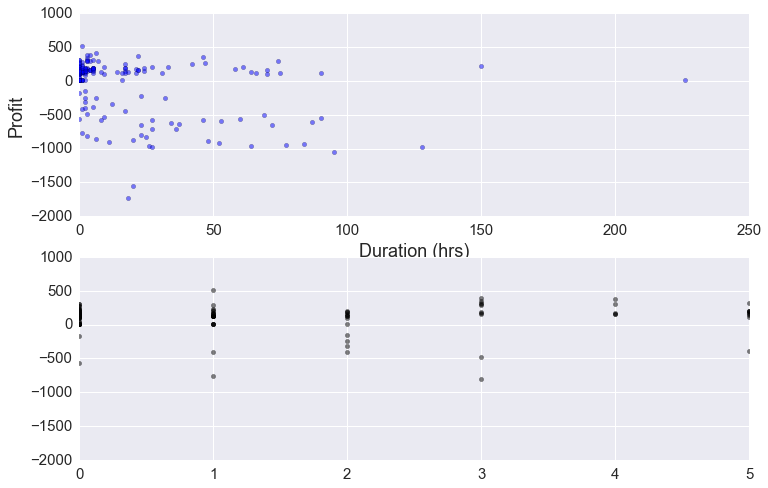

In [43]:
rcParams['xtick.labelsize']=15
rcParams['ytick.labelsize']=15
f,ax=pl.subplots(nrows=2,figsize=(12,8),sharey=True)
ax[0].scatter(divmod(df['DurS'].values,3600)[0],df['Prft'].values,alpha=0.5)
ax[0].set_xlabel('Duration (hrs)',fontsize=18)
ax[0].set_ylabel('Profit',fontsize=18)
ax[0].set_xlim(xmin=0)
ax[1].scatter(divmod(df['DurS'].values,3600)[0],df['Prft'].values,alpha=0.5,color='k')
ax[1].set_xlim((0,5))

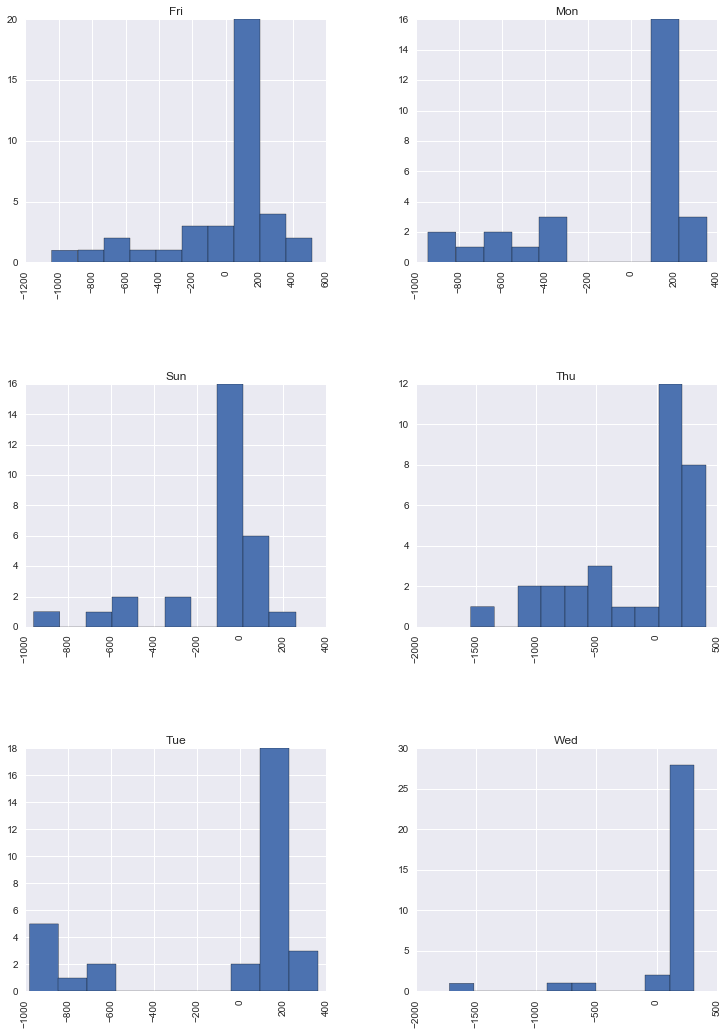

In [16]:
f,ax=pl.subplots(ncols=2,nrows=3,figsize=(12,18))
df.hist(column='Prft',by='OpWD',ax=ax);

In [45]:
pd.pivot_table(df,index=["OpDH"],values=["Prft"])

DataError: No numeric types to aggregate

In [ ]:
listTables = pd.read_html(url,header=0,index_col=1,parse_dates=True)
dfTradeRecord2 = listTables[1]
dfTradeRecord2['weekday'] = dfTradeRecord2.index.dayofweek
dfTradeRecord2.index.hourofday
dfTradeRecord2.index = pd.MultiIndex.from_arrays([dfTradeRecord.index.date, dfTradeRecord.index.time], 
                                                names=['Date','Time'])
dfTradeRecord2.rename(columns={"#":"Action #"},inplace=True)
dfTradeRecord2.head(20)

In [ ]:
writer = pd.ExcelWriter('output.xlsx',datetime_format='yyyy-mm-dd hh:mm:ss')
#use it as
#df1.to_excel(writer,'Sheet1')
#df2.to_excel(writer,'Sheet2')
#writer.save()
dfTradeRecord.to_excel(writer,'Sheet1')
writer.save()